## 1. Introduction

### Use classification technique on the Breast Cancer dataset.
**Data**: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

**Description**: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

Specifically, build a ***decision tree, logistic regression and k-nearest neighbors*** that predicts the diagnose result based on ten real-valued features 
1. mean 
2. standard error
3. worst 

#### Key Questions
Explore how well different model perform for several different parameter values. 
When is overfitting and when is underfitting? Show how you set the model that provides the best predictive performance.

Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (possible things to think about: confusion matrix, predictive accuracy, classification error, precision, recall, f-measure).

### Import Required Python libraries

In [74]:
#Import Required Libraries

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

### Load Dataset

In [75]:
#Load dataset wdbc.data

wdbc_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
conv = {'B':0,'M':1}
wdbc_cancer[1] = wdbc_cancer[1].map(conv)

#Display top 5 rows of dataset
wdbc_cancer.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


** Data Description **
- Number of instances: 569 
- Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

*** Attribute information ***

1\. ID number

2\. Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


***_Use the information above to create column names for the dataset_***

In [76]:
#Create column names or feature names for all the variables
wdbc_cancer.columns = ['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness',
                       'mean_compactness','mean_concavity','mean_concave_points','mean_symmetry','mean_fractal_dimension',
                       'radius_error','texture_error','perimeter_error','area_error','smoothness_error','compactness_error',
                       'concavity_error','concave_points_error', 'symmetry_error', 'fractal_dimension_error','worst_radius',
                       'worst_texture','worst_perimeter', 'worst_area', 'worst_smoothness','worst_compactness', 
                       'worst_concavity','worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

## 2. Data Exploration and Cleaning

In [77]:
#Explore the dataset
print("\nThe data frame has {0[0]} rows and {0[1]} columns.\n".format(wdbc_cancer.shape))
wdbc_cancer.info()
wdbc_cancer.head(3)


The data frame has 569 rows and 32 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null float64
mean_area                  569 non-null float64
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-nu

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<br>
***All variables have data type 'float64' except for diagnosis. Lets see the no of unique values in diagnosis and remove 'id' column as it is not required***
<br>
<br>

In [78]:
#Drop id column as it is not required 
wdbc_cancer.drop('id',axis=1,inplace=True)

#Unique values or categories for diagnosis
print(wdbc_cancer.diagnosis.unique())

# Malignant cases
malignant = len(wdbc_cancer[wdbc_cancer['diagnosis']==1])

#Benign cases
benign = len(wdbc_cancer[wdbc_cancer['diagnosis']==0])

print("There are {}".format(malignant)+" malignant cases.")
print("There are {}".format(benign)+" benign cases. \n")

[1 0]
There are 212 malignant cases.
There are 357 benign cases. 



***Separate the dataset into features and target data spearately in X and y ***

In [79]:
#Separate features and target columns

#Features
features = list(wdbc_cancer.columns[1:30])
print("\n Features \n")
print(features)

#Target 
print("\n Target \n")
target = wdbc_cancer.columns[0]
print(target)


 Features 

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry']

 Target 

diagnosis


In [80]:
#Separate the data into feature data (X) and target data (y)
X = wdbc_cancer[features] 
y = wdbc_cancer[target]

#c, r = y.shape
#y = y.reshape(c,)

#Verify the shape
print("Dimensions of X and Y")
print("X: ",X.shape)
print("y: ",y.shape)

Dimensions of X and Y
X:  (569, 29)
y:  (569,)


*** Find the correlation between continuous or numeric variables***

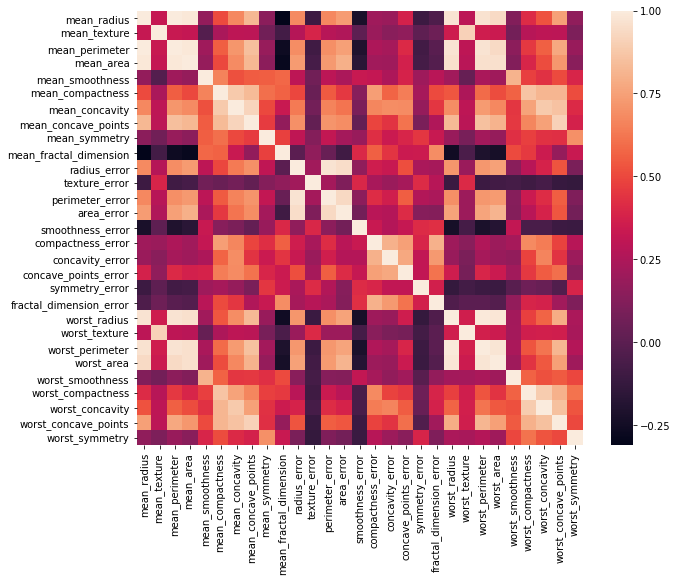

In [81]:
#Correlation Plot for continuous variables
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [82]:
tmp = X
tmp_mean = tmp[tmp.columns[0:10]]
tmp_mean = pd.concat([tmp_mean, y],axis=1)

tmp_error = tmp[tmp.columns[10:20]]
tmp_error = pd.concat([tmp_error, y],axis=1)

tmp_worst = tmp[tmp.columns[20:30]]
tmp_worst = pd.concat([tmp_worst, y],axis=1)

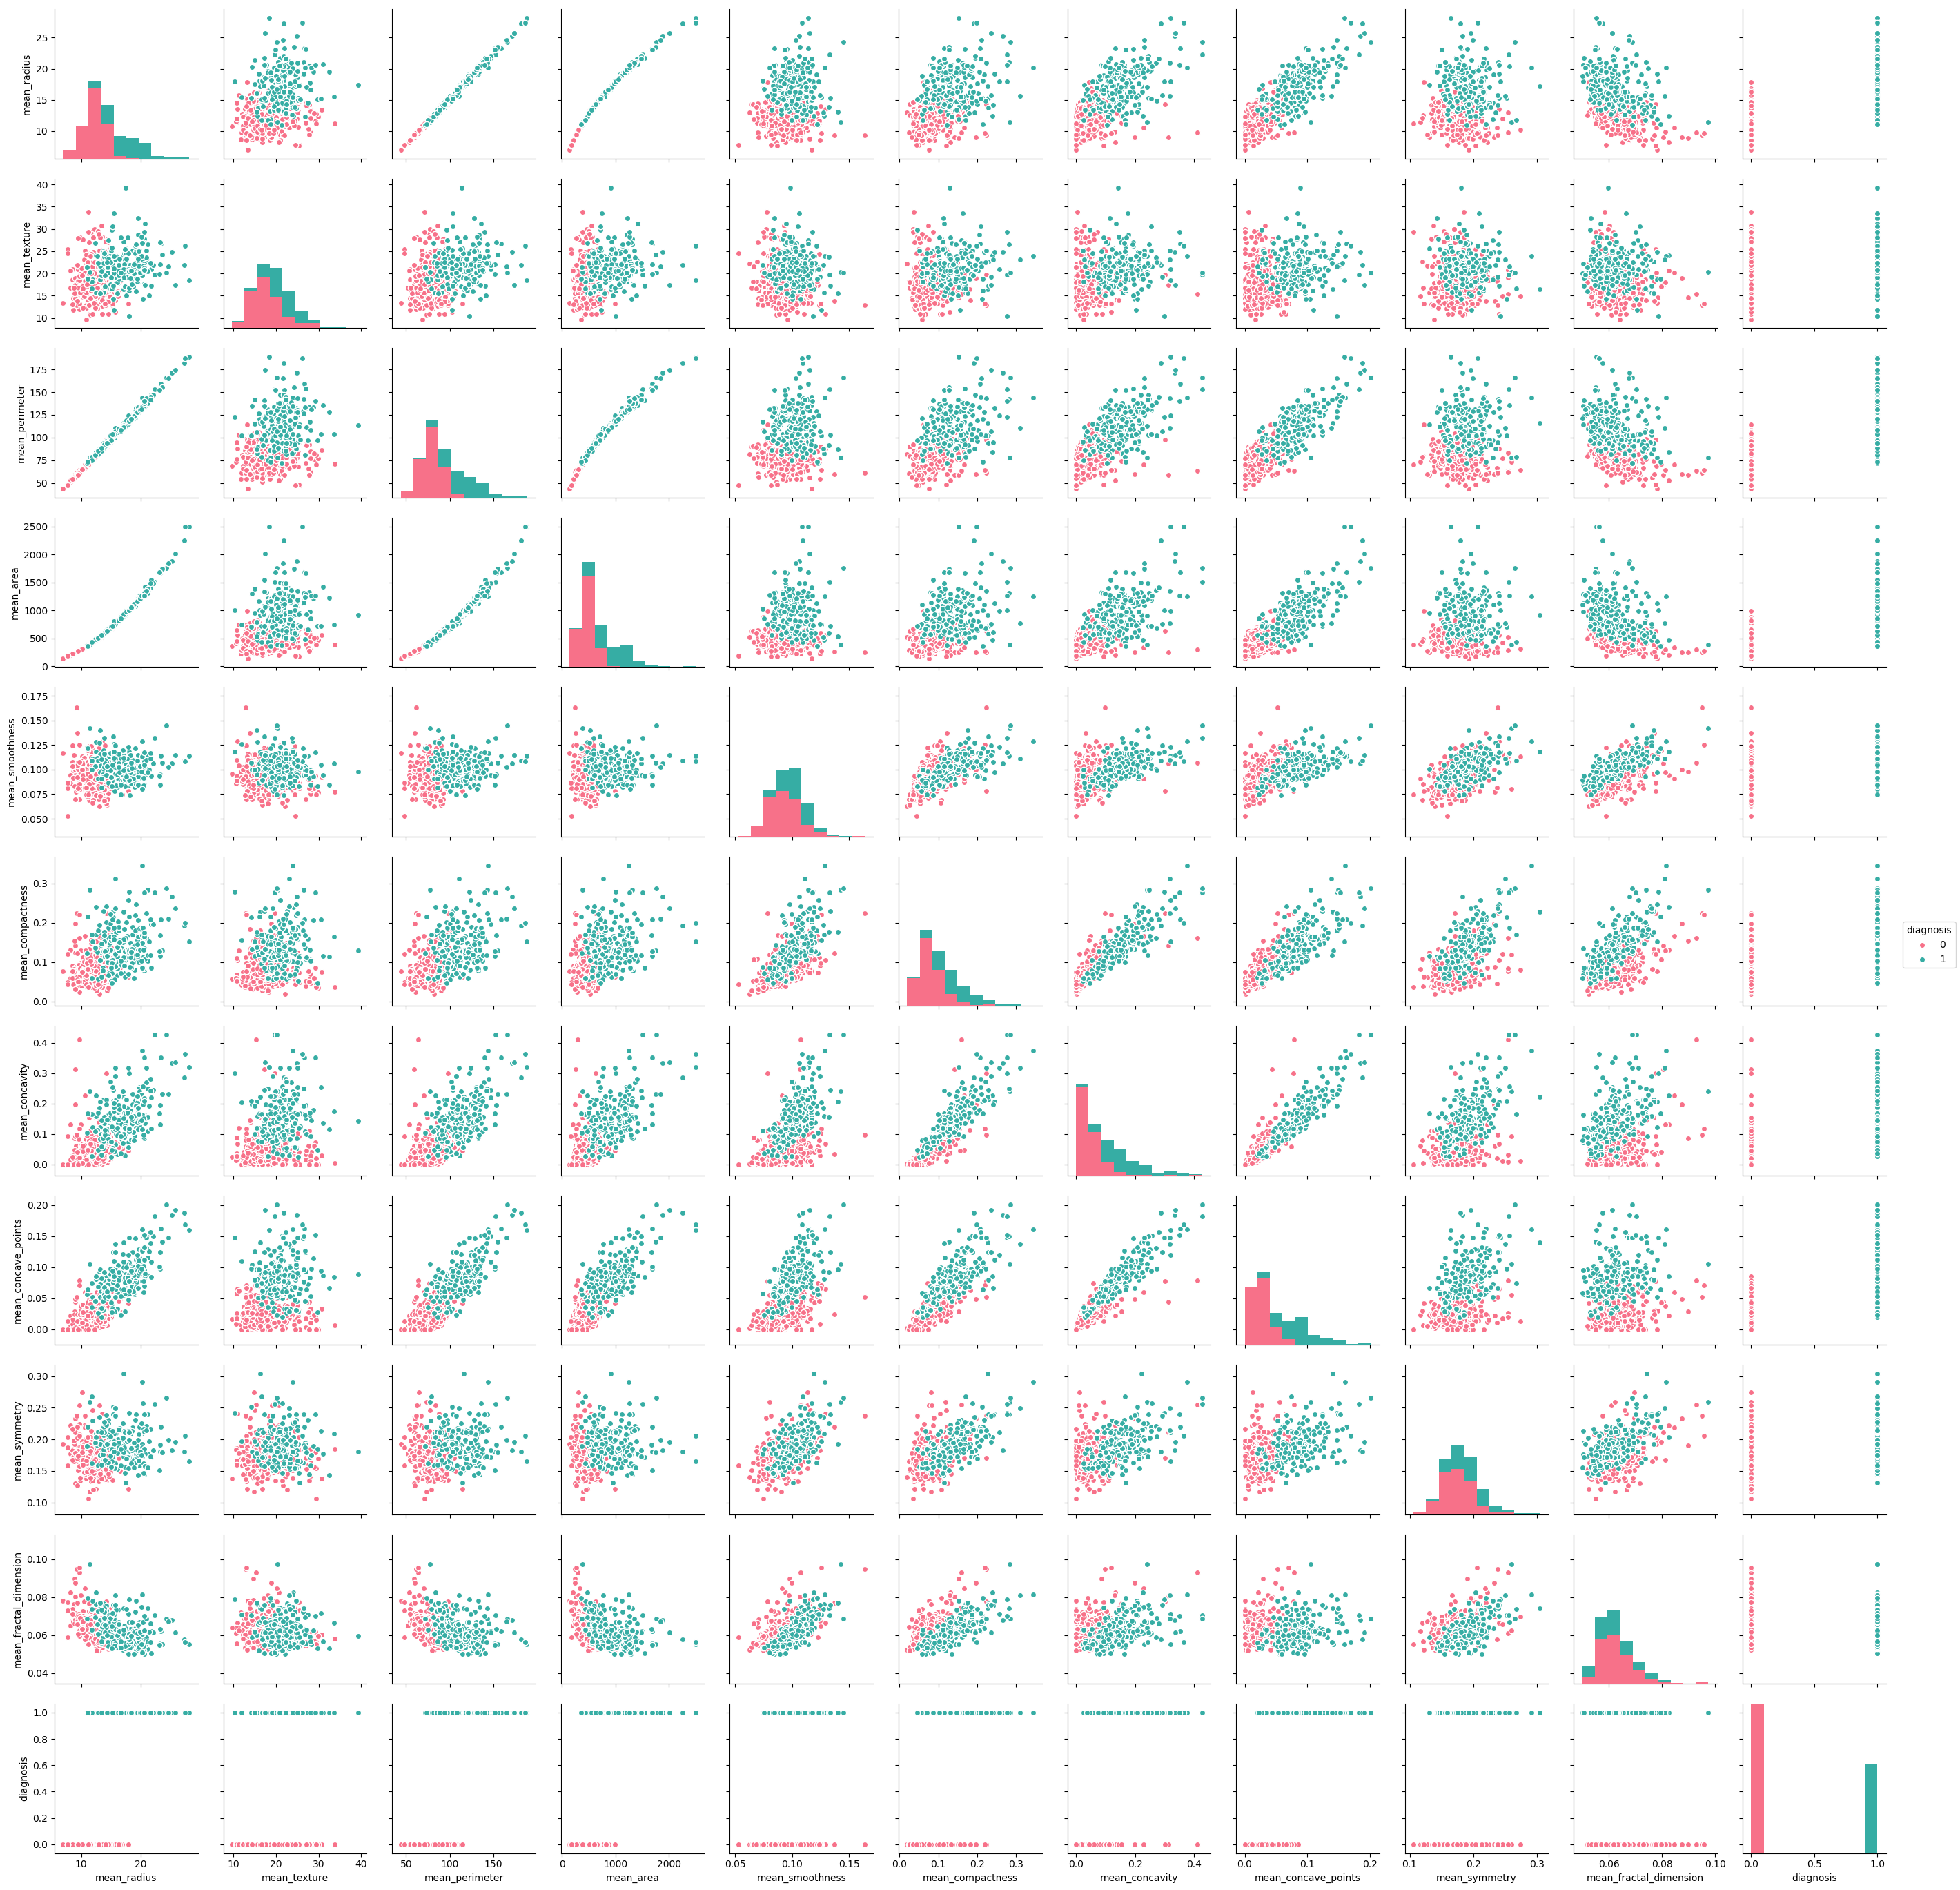

In [83]:
sns.reset_defaults()
sns.pairplot(tmp_mean,hue='diagnosis',palette="husl")

In [84]:
X.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800


*** Above summary statistics of features shows that we have features on different scale. There is definitely a need of normalizing all the features ***

*** Create function to normalize data based on min-max scaling ***

In [85]:
#Normalize data
def normalize_data(df):
    df_norm = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            df_norm[item] = ((df[item] - df[item].min()) / (df[item].max() - df[item].min()))
        else: 
            df_norm[item] = df[item]
    return df_norm

In [86]:
X_norm = normalize_data(X)

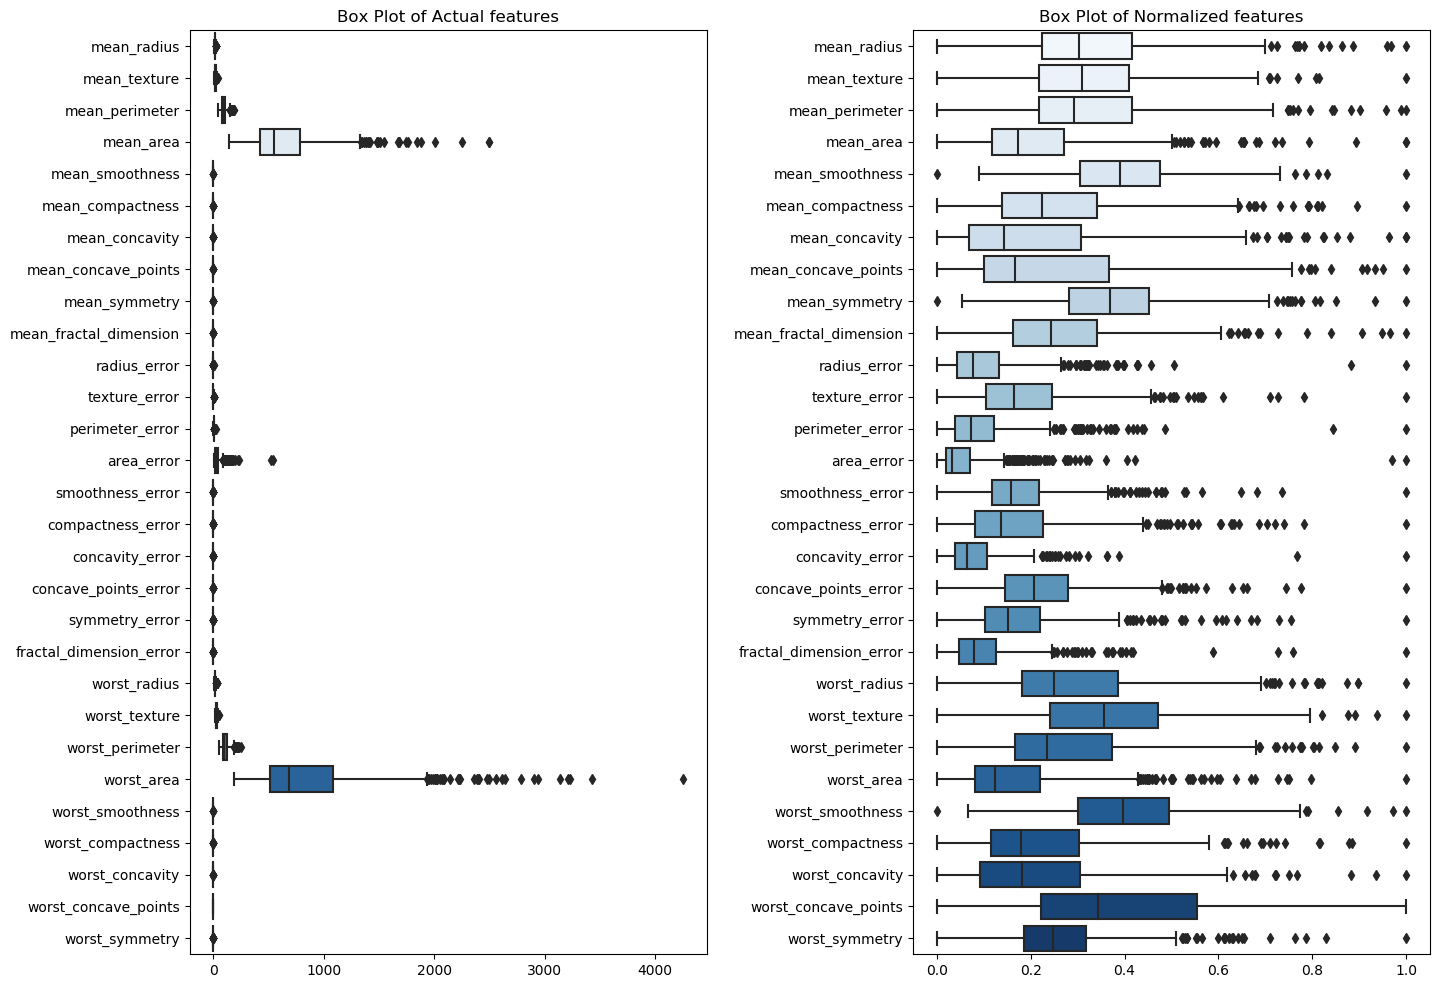

In [87]:
#Plot the features before normalization and after normalization
fig = plt.figure(figsize = (16,12))
fig.subplots_adjust(hspace=0.2, wspace=0.4)

plt.subplot(1,2,1)
plt.title("Box Plot of Actual features")
ax = sns.boxplot(data = X, orient='h', palette = 'Blues')

plt.subplot(1,2,2)
plt.title("Box Plot of Normalized features")
ax = sns.boxplot(data = X_norm, orient='h', palette = 'Blues')

*** After min-max scaling we can see that all the features are almost in range and there is not much deviation in the distribution or features are on same scale ***

In [88]:
X = X_norm

Text(0,0.5,'Number of occurrences')

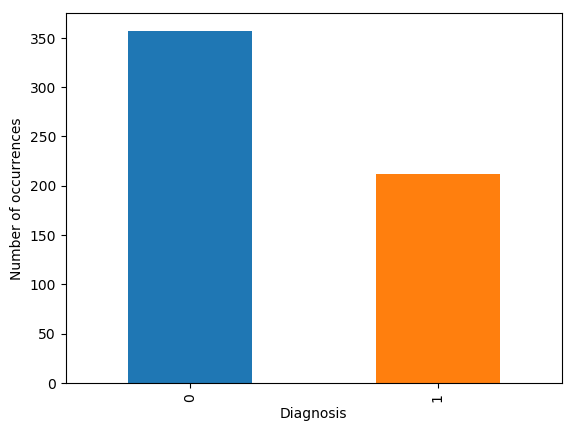

In [89]:
y.value_counts().plot(kind='bar')
plt.xlabel('Diagnosis');
plt.ylabel('Number of occurrences')

*** Above plot for the target variable 'Diagnosis' shows that the classes are imbalanced ***

**Benign - 68% **

**Malignant - 32%**

** This clearly shows that there is need of stratified sampling so that the train and test split have same representation for both the categories **
***

## 3. Model Fitting and Evaluation

** Splitting the dataset into train and test set (80 - 20) and using stratified sampling true **

In [104]:
#Split the dataset into train and test set 
#Stratified sampling 
#80 - 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123, test_size = 0.20)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

#y_train.shape[0]
#y_test.shape[0]

Training set has 455 samples.
Testing set has 114 samples.


In [105]:
#Creating arrays to store the values of all models to compare different models
accuracy_all_models = []
cross_val_score_all_models = []
precision_all = []
recall_all = []
f_measure_all = []

<br>
*** Create function to plot confusion matrix *** <br>
Reference : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [106]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#Plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Decision Tree Model

In [ ]:
We can see that the initial model fits well on the training dataset but it fits only 91.22% on the test dataset
The difference between both shows that the model is overfitting on the training dataset
This motivated us to fit cross validation model and try out grid search algorithm
Grid Search gave us the best estimating hyperparameter setting

In [107]:
#Decision Tree Classifier Fitting Base Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

test_accuracies = (clf.fit(X_train, y_train).score(X_test, y_test))
train_accuracies = (clf.fit(X_train, y_train).score(X_train, y_train))

print("The accuracy on train dataset is {0}".format(train_accuracies))
print("The accuracy on test dataset is {0}\n".format(test_accuracies))

#Decision Tree Classifier Fitting Cross Validation Model
scores = cross_val_score(clf, X, y, cv=10, scoring='recall')
print("Cross validation recall score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores), np.std(scores)*2))

scores_accuracy = cross_val_score(clf, X, y, cv=10)
print("Cross validation accuracy score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_accuracy), np.std(scores_accuracy)*2))

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9122807017543859

Cross validation recall score: 88.25% (+/- 15.79%)

Cross validation accuracy score: 91.22% (+/- 5.81%)



Average difference of 0.010368 with std. dev. of 0.003646.


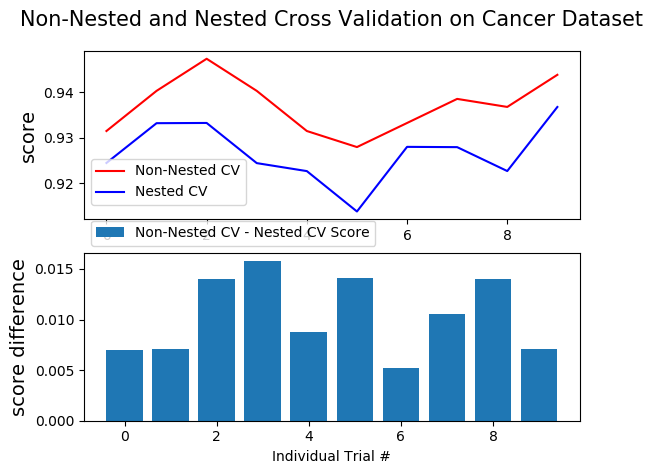

In [108]:
# Optimize decision tree using Hyperparameter Testing and GridSearchCV
NUM_TRIALS = 10

p_grid = {'max_depth': np.arange(1, 20)}

clf = DecisionTreeClassifier()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    clf = GridSearchCV(DecisionTreeClassifier(), p_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    
    # Nested CV with parameter optimization
    nested_score = cross_val_score(DecisionTreeClassifier(), X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Cancer Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference of nested and non-nested
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Normalized confusion matrix


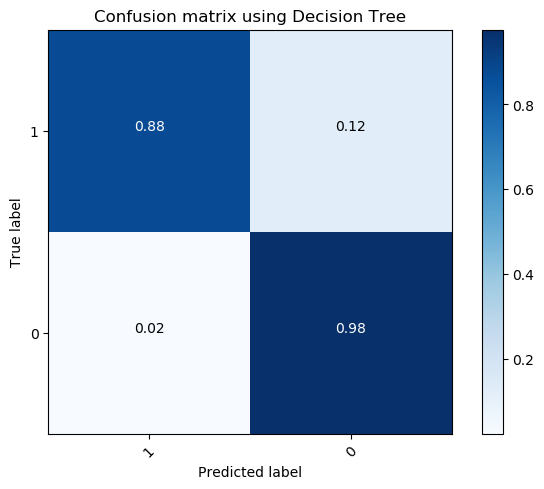

In [109]:
#Get best parameters 
bestClf = clf.best_estimator_
print(bestClf)
bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)

prec_recall_results = precision_recall_fscore_support(y_test, y_pred, average='weighted')

#Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure()
clas= np.array(wdbc_cancer.diagnosis.unique())
plot_confusion_matrix(conf, classes= clas, normalize=True, title='Confusion matrix using Decision Tree')

#Append to compare different models
accuracy_all_models.append(accuracy_score(y_pred, y_test))
cross_val_score_all_models.append(np.mean(scores))
precision_all.append(prec_recall_results[0])
recall_all.append(prec_recall_results[1])
f_measure_all.append(prec_recall_results[2])

#### Logistic Regression Model

In [ ]:
We can see that the initial model fits 97.14% on the training dataset but it fits 97.36% on the test dataset
The difference between both shows that the model is under-fitting on the training dataset
This motivated us to fit cross validation model and try out grid search algorithm
Grid Search gave us the best estimating hyperparameter setting

In [110]:
#Logistic Regression Base Model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10)

test_accuracies = (clf.fit(X_train, y_train).score(X_test, y_test))
train_accuracies = (clf.fit(X_train, y_train).score(X_train, y_train))

print("The accuracy on train dataset is {0}".format(train_accuracies))
print("The accuracy on test dataset is {0}".format(test_accuracies))


#Logistic Regression Fitting Cross Validation Model
scores = cross_val_score(clf, X, y, cv=10, scoring='recall')
print("Cross validation recall score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores), np.std(scores)*2))

scores_accuracy = cross_val_score(clf, X, y, cv=10)
print("Cross validation accuracy score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_accuracy), np.std(scores_accuracy)*2))

The accuracy on train dataset is 0.9714285714285714
The accuracy on test dataset is 0.9736842105263158
Cross validation recall score: 91.49% (+/- 10.98%)

Cross validation accuracy score: 96.49% (+/- 4.68%)



Average difference of 0.017396 with std. dev. of 0.003715.


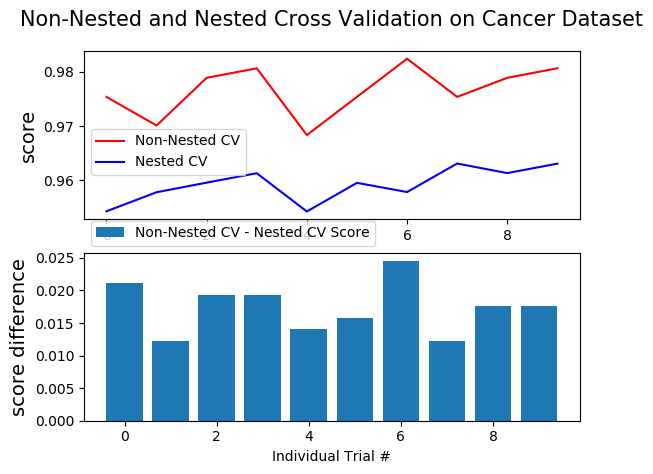

In [111]:
NUM_TRIALS = 10

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

p_grid = {"C": [1, 10, 100],
         "penalty" : ['l1','l2']}

for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    clf = GridSearchCV(LogisticRegression(), p_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    
    # Nested CV with parameter optimization
    nested_score = cross_val_score(LogisticRegression(), X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


score_difference = non_nested_scores - nested_scores


print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Cancer Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Normalized confusion matrix


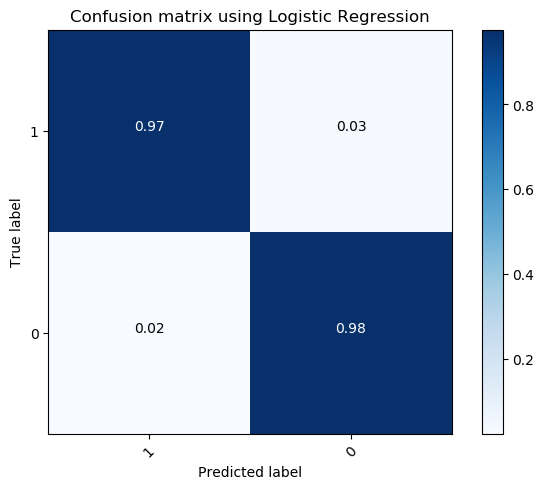

In [112]:
#Get best parameters 
bestClf = clf.best_estimator_
print(bestClf)
bestClf.fit(X_train, y_train)
y_pred = bestClf.predict(X_test)

prec_recall_results = precision_recall_fscore_support(y_test, y_pred, average='weighted')

#Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure()
clas= np.array(wdbc_cancer.diagnosis.unique())
plot_confusion_matrix(conf, classes= clas, normalize=True, title='Confusion matrix using Logistic Regression')

#Append to compare different models
accuracy_all_models.append(accuracy_score(y_pred, y_test))
cross_val_score_all_models.append(np.mean(scores))
precision_all.append(prec_recall_results[0])
recall_all.append(prec_recall_results[1])
f_measure_all.append(prec_recall_results[2])

##### k Nearest Neighbour Classifier

In [ ]:
We can see that the initial model fits 98.46% on the training dataset but it fits 97.36% on the test dataset
The difference between both is miniscule but to find the best model, we tried to fit cross validation model and try out grid search algorithm
Grid Search gave us the best estimating hyperparameter setting

In [113]:
#kNN - k Nearest Neighbour
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10)

test_accuracies = (clf.fit(X_train, y_train).score(X_test, y_test))
train_accuracies = (clf.fit(X_train, y_train).score(X_train, y_train))

print("The accuracy on train dataset is {0}".format(train_accuracies))
print("The accuracy on test dataset is {0}".format(test_accuracies))


#Logistic Regression Fitting Cross Validation
scores = cross_val_score(clf, X, y, cv=10, scoring='recall')
print("Cross validation recall score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores), np.std(scores)*2))

scores_accuracy = cross_val_score(clf, X, y, cv=10)
print("Cross validation accuracy score: {0:.2%} (+/- {1:.2%})\n".format(np.mean(scores_accuracy), np.std(scores_accuracy)*2))

The accuracy on train dataset is 0.9846153846153847
The accuracy on test dataset is 0.9736842105263158
Cross validation recall score: 93.85% (+/- 10.42%)

Cross validation accuracy score: 96.67% (+/- 3.96%)



Average difference of 0.003864 with std. dev. of 0.001889.


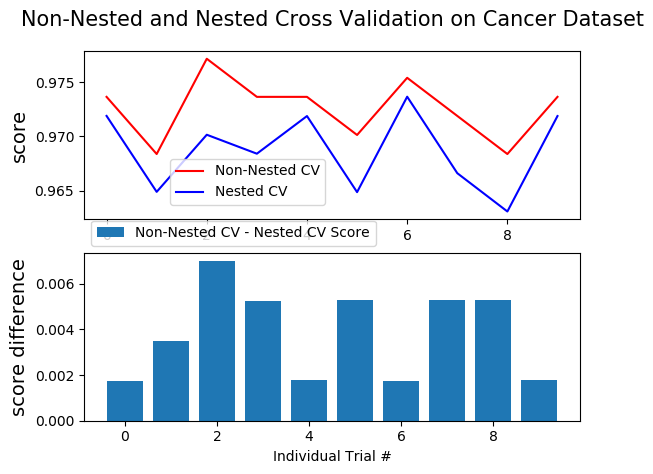

In [118]:
NUM_TRIALS = 10

# knn 
k_range = list(range(1, 16))
p_grid = dict(n_neighbors=k_range)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    clf2 = GridSearchCV(KNeighborsClassifier(), p_grid, cv=inner_cv)
    clf2.fit(X, y)
    non_nested_scores[i] = clf2.best_score_
    
    # Nested CV with parameter optimization
    nested_score = cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


score_difference = non_nested_scores - nested_scores


print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Cancer Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Normalized confusion matrix


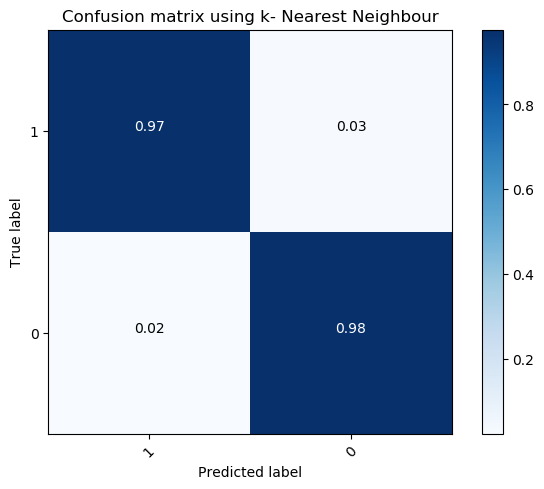

In [120]:
#Get best parameters 
bestClf1 = clf.best_estimator_
print(bestClf1)
bestClf1.fit(X_train, y_train)
y_pred = bestClf1.predict(X_test)

prec_recall_results = precision_recall_fscore_support(y_test, y_pred, average='weighted')

#Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure()
clas= np.array(wdbc_cancer.diagnosis.unique())
plot_confusion_matrix(conf, classes= clas, normalize=True, title='Confusion matrix using k- Nearest Neighbour')

#Append to compare different models
accuracy_all_models.append(accuracy_score(y_pred, y_test))
cross_val_score_all_models.append(np.mean(scores))
precision_all.append(prec_recall_results[0])
recall_all.append(prec_recall_results[1])
f_measure_all.append(prec_recall_results[2])

In [121]:
d = {'Accuracy':accuracy_all_models,'Cross Val Score': cross_val_score_all_models, 'Precision Score': precision_all, 
     'Recall_score':recall_all, 'F Score':f_measure_all }
index = ['DecisionTree', 'Logistic Regression', 'kNN Classifier']

df = pd.DataFrame(d, index=index)
df

ValueError: Shape of passed values is (5, 6), indices imply (5, 3)

In [ ]:
Based on the scores in the above table, we conclude that Logistic Regression and KNN give similar results
As Logistic Regression is computationally less expensive, we choose Logistic Regression as the best model